# Exploring Oura ring data

In [1]:
#%pip install pandas mlplot
 
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
from matplotlib.dates import DateFormatter


## First, let's grab data from local json file, using only sleep data

In [2]:
def grab_oura_json(file_path):    
    with open(file_path) as activities_file:
        data = json.load(activities_file)
        return data

file_path = 'data/oura_activities.json'
data = grab_oura_json(file_path)
# activity, notes, readiness, restful_periods, sleep    
full_df = pd.DataFrame.from_dict(data['sleep'])
#full_df.info()
#full_df.head()
#full_df.describe()
#full_df['bedtime_end']

## Now, let's build an index of bedtime_end date components

In [3]:
full_df['datetime'] = pd.to_datetime(full_df['bedtime_end'], utc=True).dt.normalize()
full_df['weekday'] = full_df['datetime'].dt.dayofweek
full_df['weekend'] = full_df['datetime'].dt.dayofweek > 4
full_df['datetime_naive'] = full_df['datetime'].apply(lambda t: t.replace(tzinfo=None))
full_df = full_df.set_index('datetime_naive')
full_df.info()
full_df['weekend']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 471 entries, 2020-08-19 to 2022-01-07
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   awake                        471 non-null    int64              
 1   bedtime_end                  471 non-null    object             
 2   bedtime_end_delta            471 non-null    int64              
 3   bedtime_start                471 non-null    object             
 4   bedtime_start_delta          471 non-null    int64              
 5   breath_average               471 non-null    float64            
 6   deep                         471 non-null    int64              
 7   duration                     471 non-null    int64              
 8   efficiency                   471 non-null    int64              
 9   hr_5min                      471 non-null    object             
 10  hr_average                   47

datetime_naive
2020-08-19    False
2020-08-20    False
2020-08-21    False
2020-08-22     True
2020-08-23     True
              ...  
2022-01-03    False
2022-01-04    False
2022-01-05    False
2022-01-06    False
2022-01-07    False
Name: weekend, Length: 471, dtype: bool

# Time to plot some sleep metrics over timeline

In [6]:
def plot_field(field_name, field_label):
    plt.rcParams["figure.figsize"] = (20,3)
    fig, ax = plt.subplots()
    plt.bar(df.index.values, field_name, data=df, axes=ax) 
    #plt.bar('datetime', field_name, data=df, axes=ax) 
    dfmt = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(dfmt)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.set_ylabel(field_label)
    plt.xticks(rotation=90) 
    plt.show()

full_df['duration_hours']=full_df['duration']/3600 # Convert seconds to hours
full_df['deep_hours']=full_df['deep']/3600 # Convert seconds to hours
    


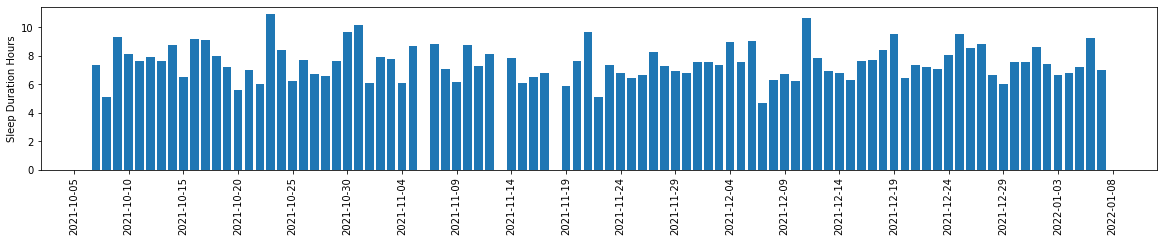

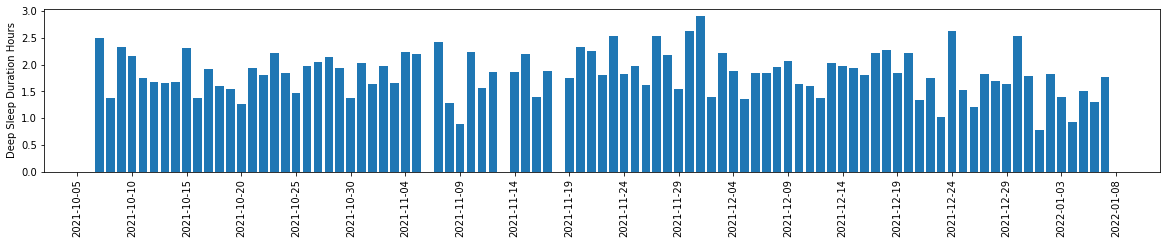

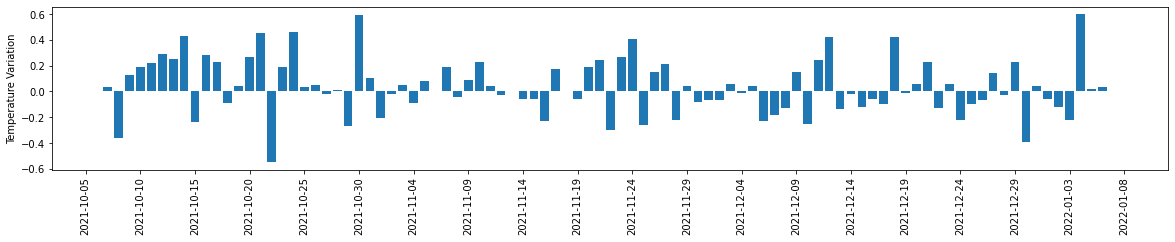

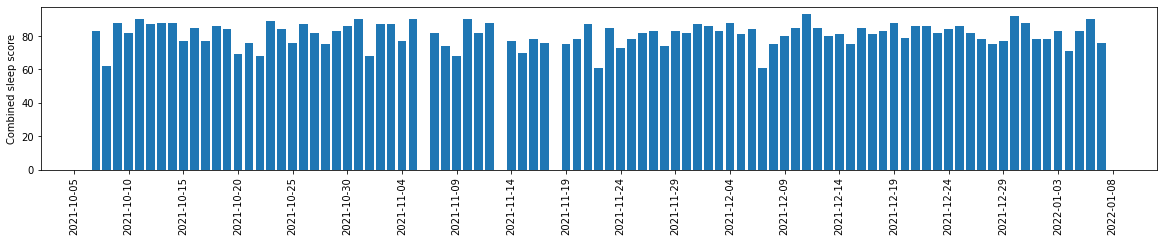

In [7]:
# duration, awake, rem, light, deep
# hr_lowest, hr_average, hr_5min
# efficiency, onset_latency, midpoint_time, restless
# temperature_delta, breath_average
# score, score_total, score_rem, score_deep, score_efficiency, score_latency, score_disturbances, score_alignment
# rmssd, rmssd_5min

df = full_df.tail(90) # Grab 90 recent dates


plot_field('duration_hours','Sleep Duration Hours')
plot_field('deep_hours','Deep Sleep Duration Hours')
plot_field('temperature_delta','Temperature Variation')
plot_field('score','Combined sleep score')


In [ ]:
#df.loc[pd.to_datetime('2021-11-05')]
#df.loc[pd.to_datetime('2021-11-06')]
df.loc[pd.to_datetime('2021-10-23')] # Weekdays 0 to 6, Monday to Sunday